<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/CryptoFinanceQuant/blob/main/Serie_Temporal_Retornos_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#baixar bibliotecas
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
#importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [ ]:
btc = web.get_data_yahoo('BTC-USD', period ='1y')["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [ ]:
btc

Date
2021-05-05    57424.007812
2021-05-06    56396.515625
2021-05-07    57356.402344
2021-05-08    58803.777344
2021-05-09    58232.316406
                  ...     
2022-04-30    37714.875000
2022-05-01    38469.093750
2022-05-02    38529.328125
2022-05-03    37750.453125
2022-05-05    39657.117188
Name: Adj Close, Length: 365, dtype: float64

In [ ]:
type(btc)

pandas.core.series.Series

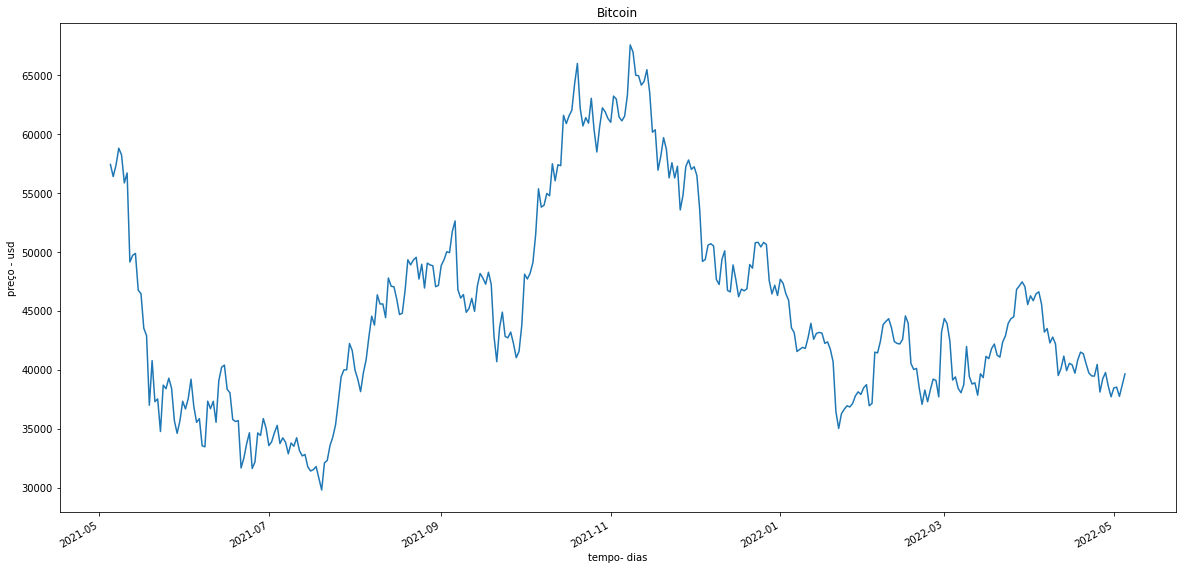

In [ ]:
btc.plot();
plt.xlabel('tempo- dias');
plt.ylabel('preço - usd');
plt.title('Bitcoin');

In [ ]:
#retornos
ret = btc.pct_change()

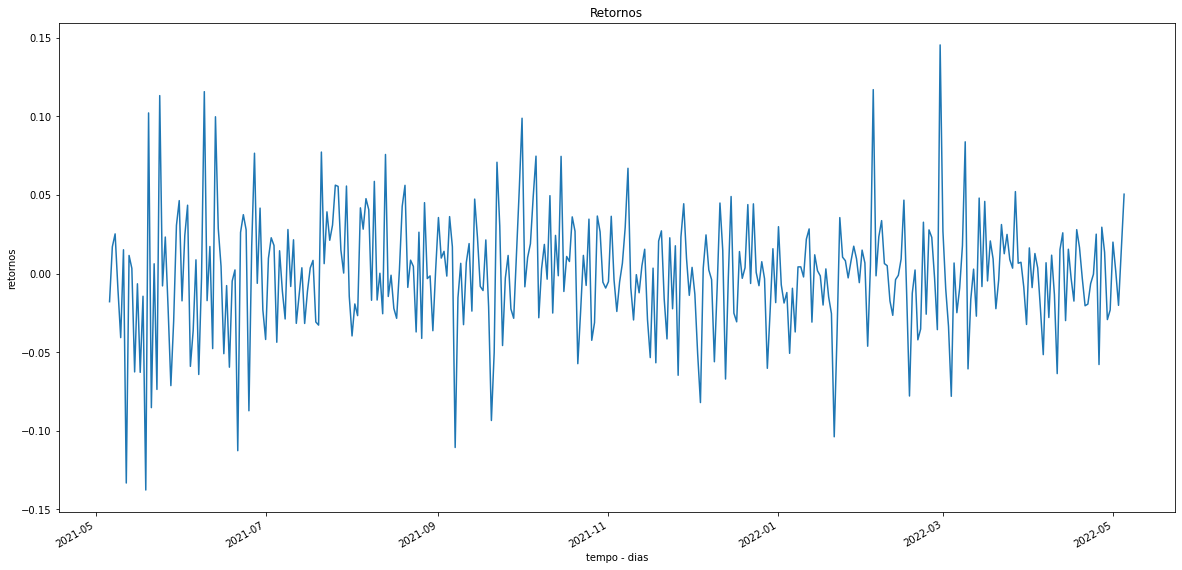

In [ ]:
ret.plot();
plt.xlabel('tempo - dias');
plt.ylabel('retornos');
plt.title('Retornos');

In [ ]:
dados = pd.DataFrame()

In [ ]:
dados['Close']= btc
dados

,Close
Date,
2021-05-05,57424.007812
2021-05-06,56396.515625
2021-05-07,57356.402344
2021-05-08,58803.777344
2021-05-09,58232.316406
...,...
2022-04-30,37714.875000
2022-05-01,38469.093750
2022-05-02,38529.328125


In [ ]:
dados['Retornos']= ret
dados

,Close,Retornos
Date,,
2021-05-05,57424.007812,NaN
2021-05-06,56396.515625,-0.017893
2021-05-07,57356.402344,0.017020
2021-05-08,58803.777344,0.025235
2021-05-09,58232.316406,-0.009718
...,...,...
2022-04-30,37714.875000,-0.023179
2022-05-01,38469.093750,0.019998
2022-05-02,38529.328125,0.001566


In [ ]:
dados['lag1'] = dados['Retornos'].pct_change(1)

In [ ]:
dados

,Close,Retornos,lag1
Date,,,
2021-05-05,57424.007812,NaN,NaN
2021-05-06,56396.515625,-0.017893,NaN
2021-05-07,57356.402344,0.017020,-1.951224
2021-05-08,58803.777344,0.025235,0.482625
2021-05-09,58232.316406,-0.009718,-1.385108
...,...,...,...
2022-04-30,37714.875000,-0.023179,-0.207967
2022-05-01,38469.093750,0.019998,-1.862748
2022-05-02,38529.328125,0.001566,-0.921703


In [ ]:
dados['lag2'] = dados['Retornos'].pct_change(2)
dados['lag3'] = dados['Retornos'].pct_change(3)
dados['lag4'] = dados['Retornos'].pct_change(4)
dados['lag5'] = dados['Retornos'].pct_change(5)

In [ ]:
dados

,Close,Retornos,lag1,lag2,lag3,lag4,lag5
Date,,,,,,,
2021-05-05,57424.007812,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-06,56396.515625,-0.017893,NaN,NaN,NaN,NaN,NaN
2021-05-07,57356.402344,0.017020,-1.951224,NaN,NaN,NaN,NaN
2021-05-08,58803.777344,0.025235,0.482625,-2.410309,NaN,NaN,NaN
2021-05-09,58232.316406,-0.009718,-1.385108,-1.570970,-0.456879,NaN,NaN
...,...,...,...,...,...,...,...
2022-04-30,37714.875000,-0.023179,-0.207967,-2.707472,-1.786302,-0.599378,-1.925032
2022-05-01,38469.093750,0.019998,-1.862748,-1.683325,0.473118,-0.321619,-1.345636
2022-05-02,38529.328125,0.001566,-0.921703,-1.067551,-1.053503,-0.884659,-0.946884


In [ ]:
dados = dados.dropna()

In [ ]:
dados

,Close,Retornos,lag1,lag2,lag3,lag4,lag5
Date,,,,,,,
2021-05-11,56704.574219,0.015123,-1.371191,-2.556186,-0.400701,-0.111464,-1.845197
2021-05-12,49150.535156,-0.133217,-9.808830,2.269756,12.708180,-6.279125,-8.826966
2021-05-13,49716.191406,0.011509,-1.086390,-0.239006,-1.282474,-2.184249,-0.543937
2021-05-14,49880.535156,0.003306,-0.712769,-1.024814,-0.781419,-1.081135,-1.340153
2021-05-15,46760.187500,-0.062556,-19.924157,-6.435601,-0.530419,-5.136461,0.535416
...,...,...,...,...,...,...,...
2022-04-30,37714.875000,-0.023179,-0.207967,-2.707472,-1.786302,-0.599378,-1.925032
2022-05-01,38469.093750,0.019998,-1.862748,-1.683325,0.473118,-0.321619,-1.345636
2022-05-02,38529.328125,0.001566,-0.921703,-1.067551,-1.053503,-0.884659,-0.946884


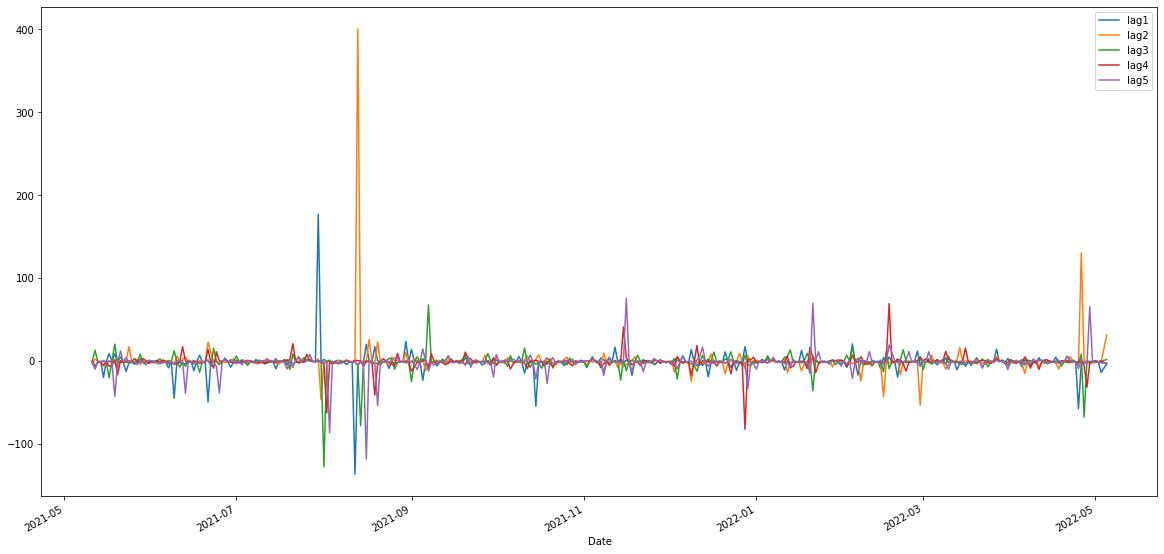

In [ ]:
dados.iloc[:,2:].plot()

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dados.shape

(359, 7)

In [ ]:
dados.describe()

,Close,Retornos,lag1,lag2,lag3,lag4,lag5
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,44747.675063,-0.000237,-1.510819,0.220375,-1.463010,-1.306149,-1.747014
std,8407.660178,0.037853,13.888307,23.203997,10.596121,8.432390,11.974237
min,29807.347656,-0.137661,-136.393869,-53.280144,-127.771745,-82.267974,-118.381581
25%,38569.576172,-0.021987,-2.120960,-2.032927,-1.976261,-2.176085,-2.077880
50%,43113.878906,0.000741,-1.114053,-1.106853,-0.958513,-1.045412,-1.153065
75%,48899.562500,0.020960,-0.213601,-0.055300,0.072191,-0.086034,-0.200737
max,67566.828125,0.145412,176.891899,400.215071,67.531113,69.071874,75.727977


In [ ]:
#limpeza de dados indesejaveis(NaN, inf ..)
dados = dados[~dados.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
dados.shape

(359, 7)

In [ ]:
Y = dados['Retornos'] # variavel dependente
X = dados.iloc[:,2:]

In [ ]:
X

,lag1,lag2,lag3,lag4,lag5
Date,,,,,
2021-05-11,-1.371191,-2.556186,-0.400701,-0.111464,-1.845197
2021-05-12,-9.808830,2.269756,12.708180,-6.279125,-8.826966
2021-05-13,-1.086390,-0.239006,-1.282474,-2.184249,-0.543937
2021-05-14,-0.712769,-1.024814,-0.781419,-1.081135,-1.340153
2021-05-15,-19.924157,-6.435601,-0.530419,-5.136461,0.535416
...,...,...,...,...,...
2022-04-30,-0.207967,-2.707472,-1.786302,-0.599378,-1.925032
2022-05-01,-1.862748,-1.683325,0.473118,-0.321619,-1.345636
2022-05-02,-0.921703,-1.067551,-1.053503,-0.884659,-0.946884


In [ ]:
Y

Date
2021-05-11    0.015123
2021-05-12   -0.133217
2021-05-13    0.011509
2021-05-14    0.003306
2021-05-15   -0.062556
                ...   
2022-04-30   -0.023179
2022-05-01    0.019998
2022-05-02    0.001566
2022-05-03   -0.020215
2022-05-05    0.050481
Name: Retornos, Length: 359, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [ ]:
#metodo dos minimos quadrados para regrassão linear
model = sm.OLS(y_train,x_train).fit()
predictions = model.predict(x_test)

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:               Retornos   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):             -0.009
Method:                 Least Squares   F-statistic:                             0.4895
Date:                Thu, 05 May 2022   Prob (F-statistic):                       0.784
Time:                        02:22:50   Log-Likelihood:                          536.03
No. Observations:                 287   AIC:                                     -1062.
Df Residuals:                     282   BIC:                                     -1044.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R =  0.009, bastante baixo. portanto não serve, nao temos a capacidade de explicar um predição com base nos lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

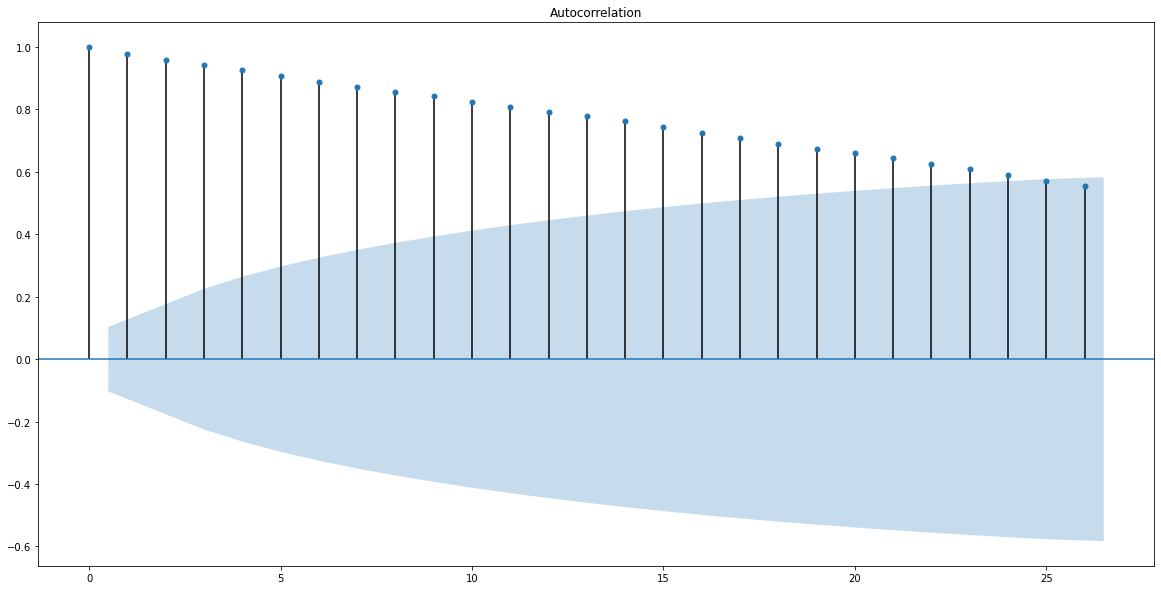

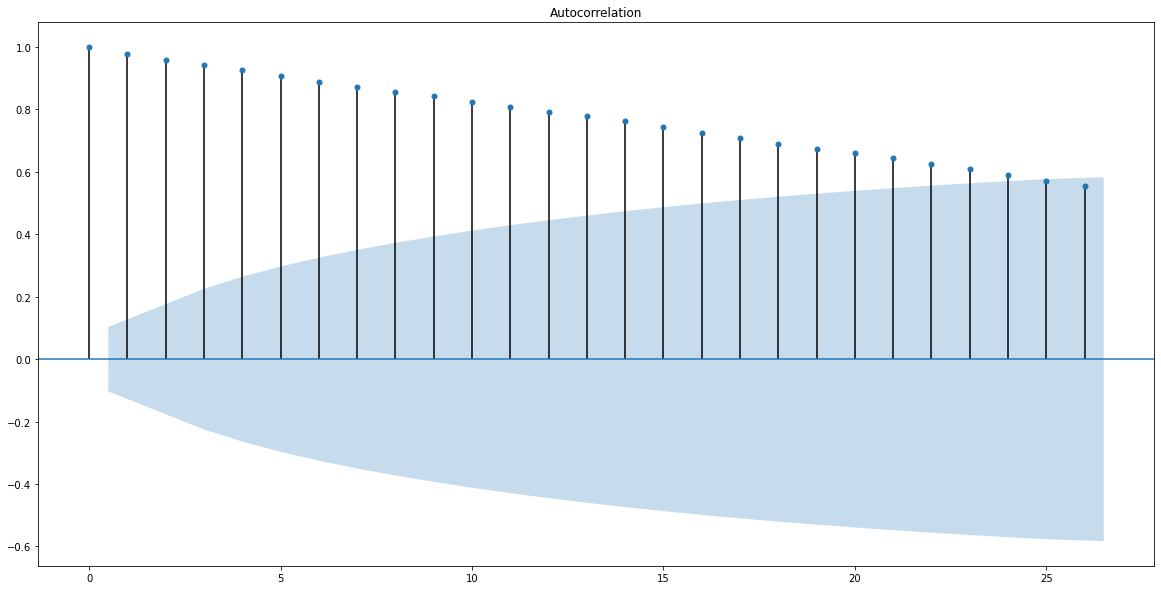

In [ ]:
plot_acf(dados['Close'])

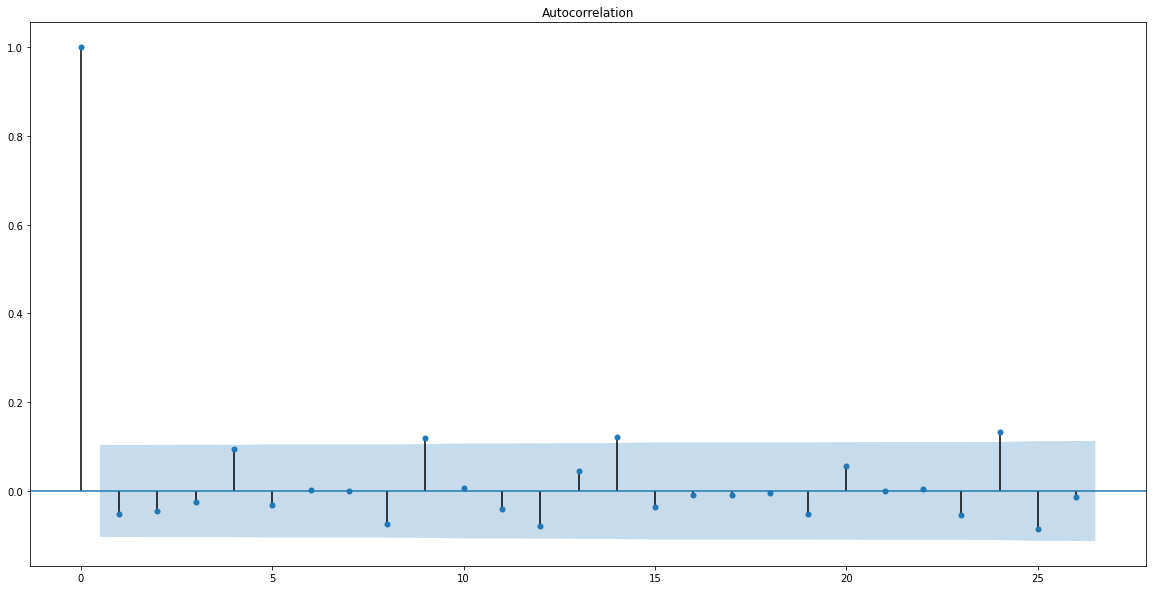

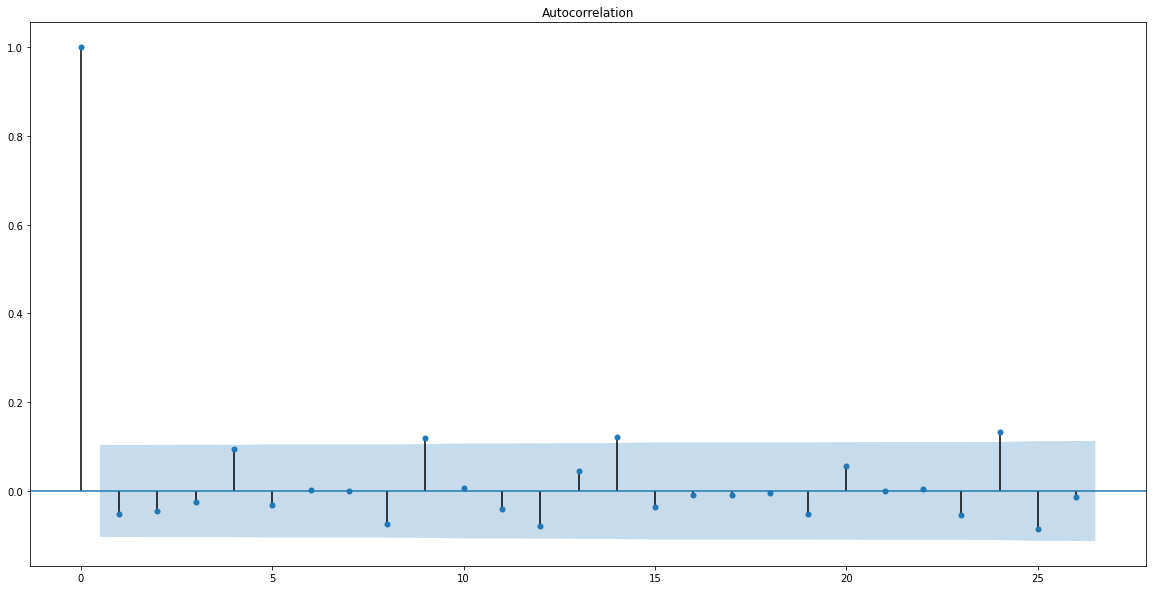

In [ ]:
plot_acf(dados['Retornos'])